<a href="https://colab.research.google.com/github/LibertyV7/assignment3/blob/main/Copy_of_assignment_knn_and_kmc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3: $k$ Nearest Neighbor and $k$ Means Clustering

## **Do three questions.**

`! git clone https://www.github.com/DS3001/assignment3`

In [1]:
! git clone https://www.github.com/DS3001/assignment3

Cloning into 'assignment3'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 14 (delta 0), reused 1 (delta 0), pack-reused 10
Receiving objects: 100% (14/14), 872.93 KiB | 9.00 MiB/s, done.
Resolving deltas: 100% (1/1), done.


**Q1.** This question is a case study for $k$ nearest neighbor. The target variable `y` is `Purchase` and the features of interest are `Age` and `AnnualSalary`.

1. Load the `./data/car_data.csv` data. Look at the head and dimensions of the data.
2. Summarize the variables (`User.ID`, `Gender`, `Age`, `AnnualSalary`, `Purchase`). Are there any missings to clean? Convert the `Gender` categorical variable into a dummy variable that takes the value 0 for male and 1 for female. Create a matrix $X$ of predictors including `Age` and `AnnualSalary`, and an outcome $y$ equaling `Purchase`.
3. MaxMin-normalize `Age` and `AnnualSalary` in `X`.
4. Split the sample into a ~80% training dataset and a ~20% testing dataset.
5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors $k$ to use.
6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a **confusion matrix**. How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?
7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/assignment3/data/car_data.csv")
print(df.columns)
df.head()

Index(['User ID', 'Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')


,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [3]:
df.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [4]:
df['Gender'].value_counts()
df['f'] = 0
df.loc[ df['Gender']== 'Female', 'f'] = 1
df['f'].value_counts()

1    516
0    484
Name: f, dtype: int64

In [5]:
predictors = ["Age", "AnnualSalary"]
x = df.loc[:,predictors]
y = df['Purchased']

In [6]:
from sklearn.neighbors import KNeighborsRegressor as kNNRegression

def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

# Apply maxmin:
x = x.apply(maxmin)
x.head()
x.describe()

,Age,AnnualSalary
count,1000.000000,1000.000000
mean,0.491244,0.419556
std,0.237935,0.250824
min,0.000000,0.000000
25%,0.311111,0.228182
50%,0.488889,0.414545
75%,0.666667,0.545455
max,1.000000,1.000000


In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=100)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

k_bar = 35
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar)

for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(x_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(x_test) # Predict values for test set
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # Save the computd SSE

In [9]:
SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index]
print(k_star)

[ 8 10 14]


<function matplotlib.pyplot.show(close=None, block=None)>

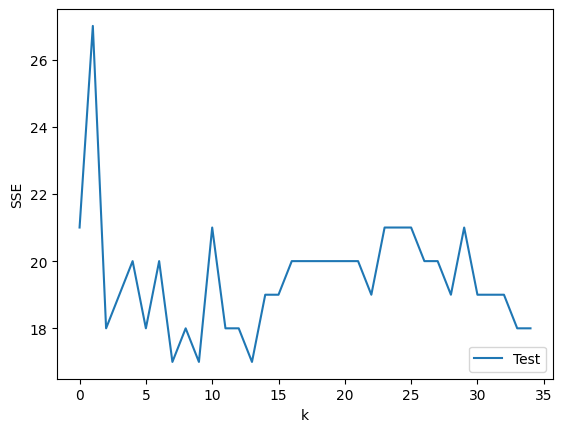

In [10]:
plt.plot(np.arange(0,k_bar), SSE, label='Test')
plt.xlabel('k')
plt.ylabel('SSE')
plt.legend(loc='lower right')
plt.show

Optimal value of K either 9 or 23. Will test both to experiment with performance.
// later

very similar results for both, makes sense considering their similar positions on the graph.

In [11]:
model = KNeighborsClassifier(n_neighbors=23)
fitted_model = model.fit(x_train, y_train)
y_hat = fitted_model.predict(x_test)

pd.crosstab(y_test, y_hat)

col_0,0,1
Purchased,,
0,103,16
1,3,78


In [12]:
model = KNeighborsClassifier(n_neighbors=9)
fitted_model = model.fit(x_train, y_train)
y_hat = fitted_model.predict(x_test)

pd.crosstab(y_test, y_hat)

col_0,0,1
Purchased,,
0,104,15
1,3,78


The model is fairly accurate. There were 18 wrong predictions, which makes a 91% accuracy rate.

In [13]:
predictors = ["Age", "AnnualSalary", 'Gender']
x = df.loc[:,predictors]
y = df['Purchased']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=100)

#set up k without gender
model = KNeighborsClassifier(n_neighbors=9)
fitted_model = model.fit(x_train.drop('Gender', axis=1), y_train)
y_hat = fitted_model.predict(x_test.drop('Gender', axis=1))

# predict by sex
y_hat_M = y_hat[ x_test['Gender'] == 'Male']
y_M = y_test[ x_test['Gender'] == 'Male']
y_hat_F = y_hat[ x_test['Gender'] == 'Female']
y_F = y_test[ x_test['Gender'] == 'Female']

In [14]:
# Female crosstab
pd.crosstab(y_F, y_hat_F)

col_0,0,1
Purchased,,
0,58,9
1,5,33


In [15]:
pd.crosstab(y_M, y_hat_M)

col_0,0,1
Purchased,,
0,45,7
1,15,28


Women have a 78% accuracy rate compared to men. Men have a 77% accuracy rate. Notably when I changed the number of KNN to 9, men had a lower accuracy than women. The values here were collected from a KNN of 23. With a value of 9, men had a 77% accuracy while women had an 87% accuracy.

**Q2.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm for regression and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [42]:
df = pd.read_csv("/content/assignment3/data/USA_cars_datasets.csv")
var = ["year", "mileage"]
x = df.loc[:,var]
y = df['price']

print(df[var].columns)
df[var].head()
df[var].describe()

Index(['year', 'mileage'], dtype='object')


,year,mileage
count,2499.000000,2.499000e+03
mean,2016.714286,5.229869e+04
std,3.442656,5.970552e+04
min,1973.000000,0.000000e+00
25%,2016.000000,2.146650e+04
50%,2018.000000,3.536500e+04
75%,2019.000000,6.347250e+04
max,2020.000000,1.017936e+06


It doesn't seem like there are many missing values, although there are a few 0's for the min.

In [43]:
from sklearn.neighbors import KNeighborsRegressor as kNNRegression

def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

# Apply maxmin:
x = x.apply(maxmin)
x.head()
x.describe()

,year,mileage
count,2499.000000,2499.000000
mean,0.930091,0.051377
std,0.073248,0.058654
min,0.000000,0.000000
25%,0.914894,0.021088
50%,0.957447,0.034742
75%,0.978723,0.062354
max,1.000000,1.000000


In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=100)

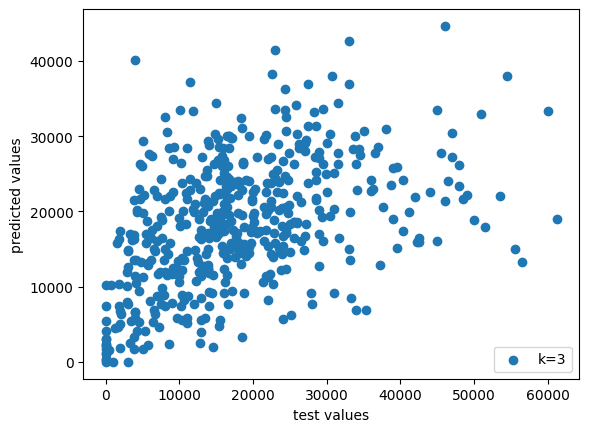

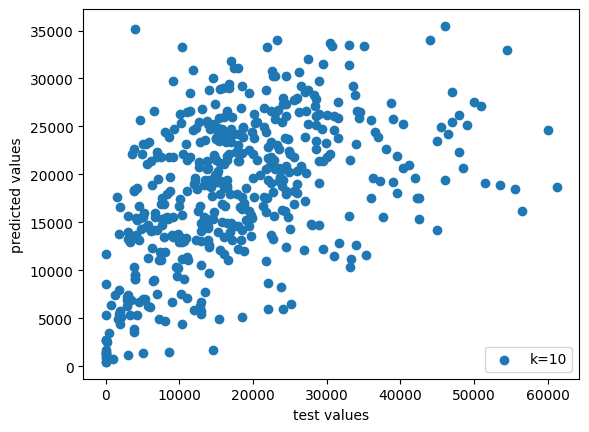

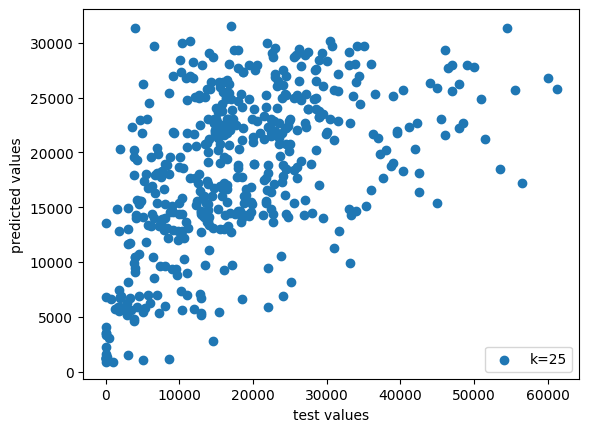

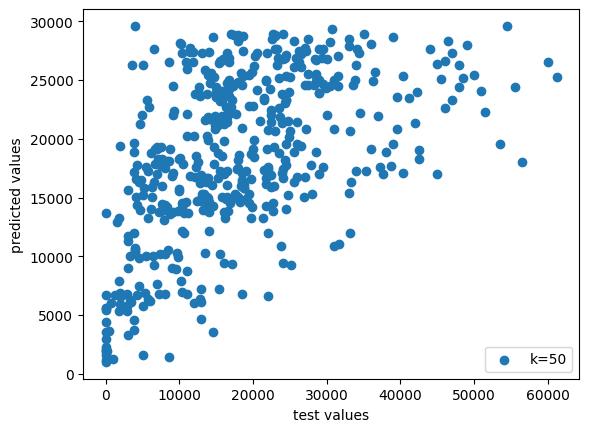

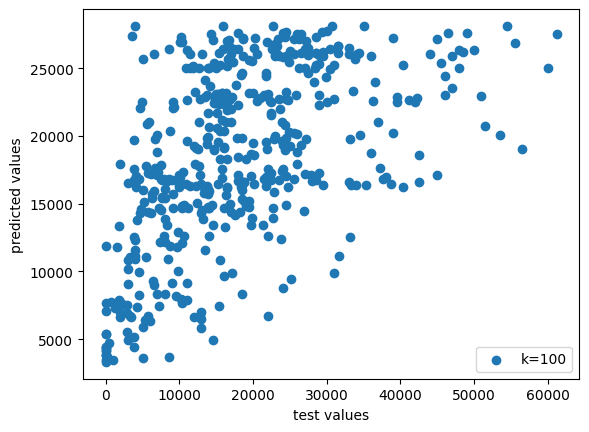

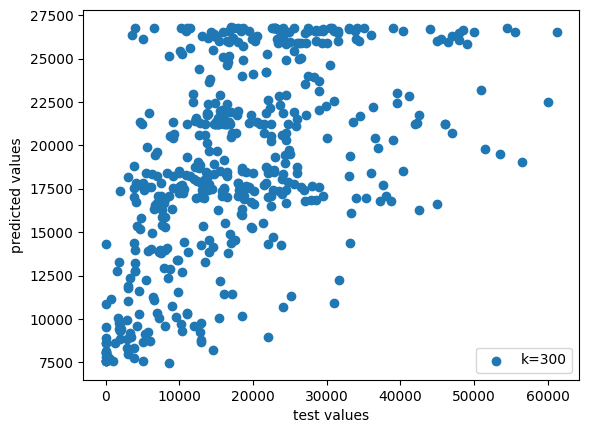

In [59]:
k_values = [3, 10, 25, 50, 100, 300]
SSE = []

for k in k_values:
    model = kNNRegression(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(x_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(x_test) # Predict values for test set

    sse = np.sum((y_test - y_hat) ** 2)
    SSE.append(sse)

    plt.figure()
    plt.scatter(y_test, y_hat, label=f'k={k}')
    plt.xlabel('test values')
    plt.ylabel('predicted values')
    plt.legend(loc='lower right')



k_star = k_values[np.argmin(SSE)]
SSE_min = np.min(SSE)

As K increased, the data became more and more condensed. The predicted values would get lower and lower as compared to the test values. It seems like k=3 has the most overlap between testing and predicted values. K values 100 and 300 especially seem to be overfit as it fails to match the testing data, while the lower values 2 and 10 seem to underfit. K = 50 seems to be the best fit from the graphs above.

**Q3.** This question is a case study for $k$ nearest neighbor, particularly variable selection. The data for the question include (summaries reproduced here directly from the codebook):

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables better, in this case? Explain your findings.

**Q4.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

**Q5.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q6.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [16]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

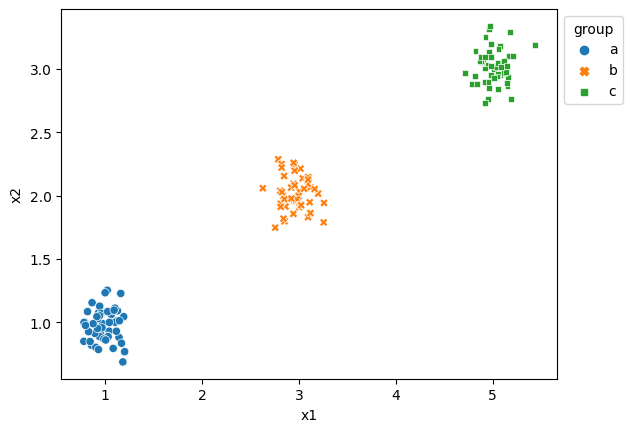

In [17]:
import seaborn as sns

myplot = sns.scatterplot(data = df0_125, x = 'x1',y='x2',hue='group',style='group')
sns.move_legend(myplot, "upper left", bbox_to_anchor=(1, 1))

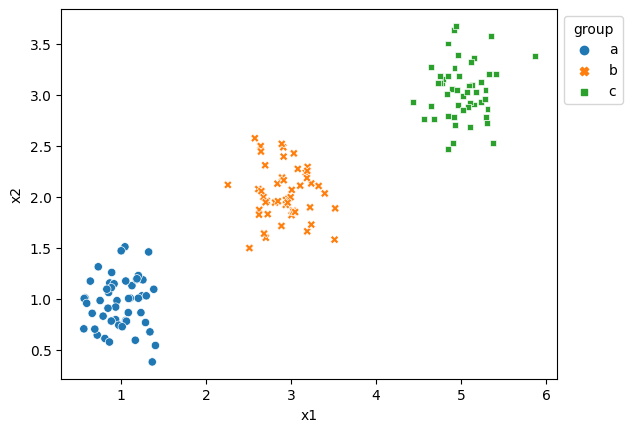

In [18]:
myplot = sns.scatterplot(data = df0_25, x = 'x1',y='x2',hue='group',style='group')
sns.move_legend(myplot, "upper left", bbox_to_anchor=(1, 1))

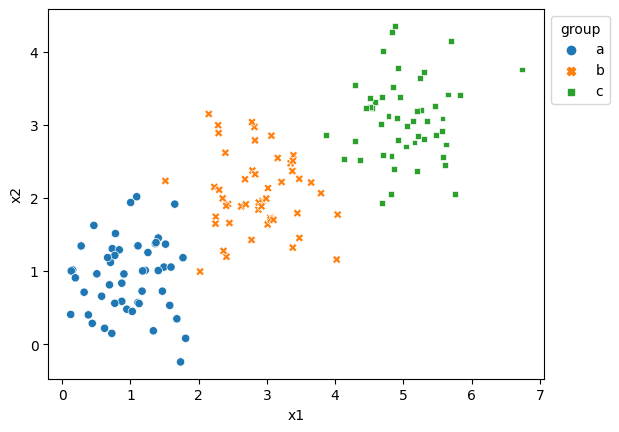

In [19]:
myplot = sns.scatterplot(data = df0_5, x = 'x1',y='x2',hue='group',style='group')
sns.move_legend(myplot, "upper left", bbox_to_anchor=(1, 1))

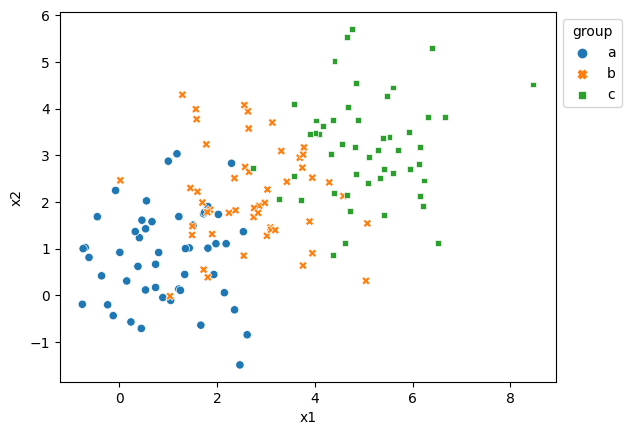

In [20]:
myplot = sns.scatterplot(data = df1_0, x = 'x1',y='x2',hue='group',style='group')
sns.move_legend(myplot, "upper left", bbox_to_anchor=(1, 1))

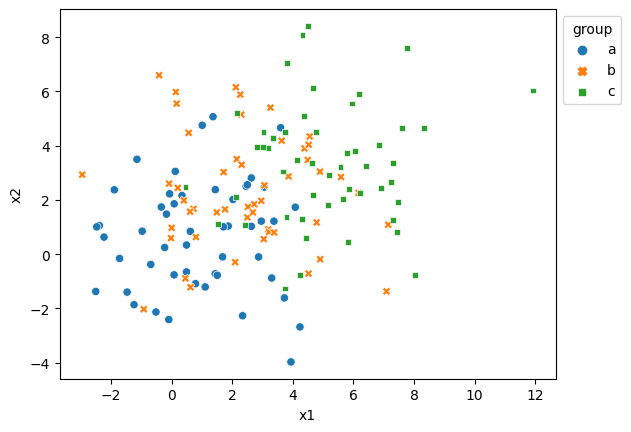

In [21]:
myplot = sns.scatterplot(data = df2_0, x = 'x1',y='x2',hue='group',style='group')
sns.move_legend(myplot, "upper left", bbox_to_anchor=(1, 1))

As the noise increases, the clustering disapears and the groups begin to merge into one large glob. With less noise, the clusters are more concrete.

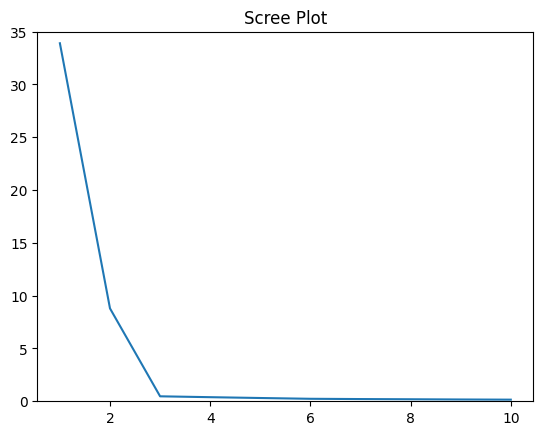

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

def maxmin(z):
    z = (z - min(z)) / (max(z) - min(z))
    return z

def scree(data):
    # Preprocess the data:
    mydata = data.loc[:, ['x1', 'x2']]
    x = mydata.apply(maxmin)

    k_bar = 10
    k_grid = np.arange(1, k_bar + 1)
    SSE = np.zeros(k_bar)
    for k in range(k_bar):
        model = KMeans(n_clusters=k + 1, max_iter=300, n_init=10, random_state=0)
        model = model.fit(x)
        SSE[k] = model.inertia_

    # Create the scree plot
    scree_plot, axes = plt.subplots()
    sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')
    axes.set_ylim(0, 35)
    plt.show()

# Call the scree function with your data
scree(data=df0_125)


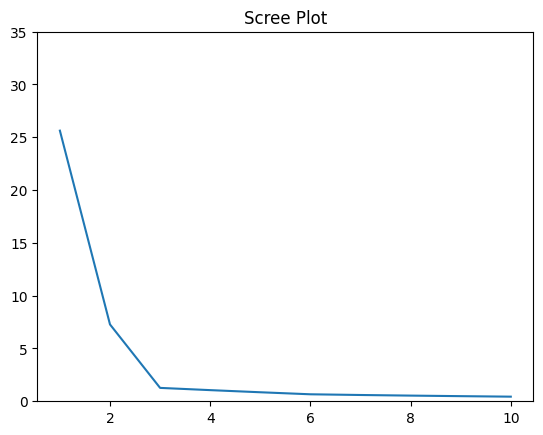

In [23]:
scree(data=df0_25)

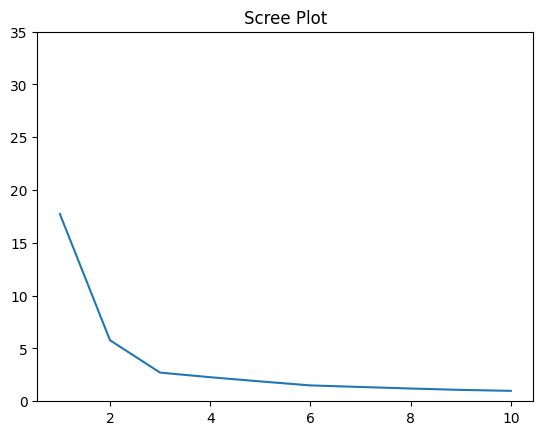

In [24]:
scree(data=df0_5)

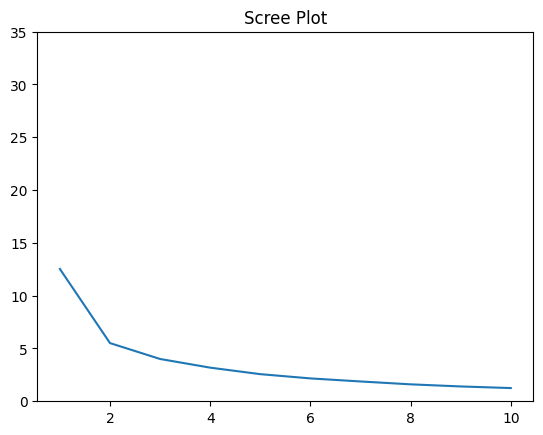

In [25]:
scree(data=df1_0)

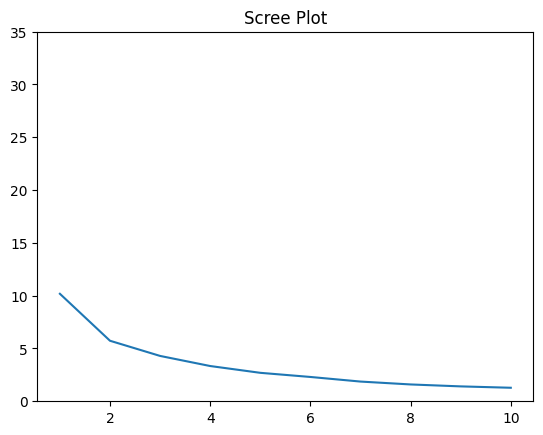

In [26]:
scree(data=df2_0)

As the noise increases, the presence of the elbow decreases. The first 0.125 has an obvious elbow, and the first two do as well. By the last two graphs, the elbows are virtually nonexistant.

Explain the intuition of the elbow:

Low levels of noise corresbond to more visible elbows. This is because with less overlap of the clusters, the the data is more spread out and thus there is no large drop in SSE. Well clustered data will reflect a defined elbow point like in the first graph, while data that is less clustered has a smooth scree plot. This is shown in the corrreponding phenomena from the first to last cluster plots followed by the first to last scree plots.

**Q7.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?